In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [2]:
(x_train, _),(x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,784).astype('float32')/255
x_test = x_test.reshape(-1,784).astype('float32')/255

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
input_dim = x_train.shape[1]
encoding_dim = 2

In [5]:
#model autoenkodera
input_layer = Input(shape=(input_dim))
encoder = Dense(128,activation='relu')(input_layer)
encoder = Dense(64,activation='relu')(encoder)
encoder_output = Dense(encoding_dim)(encoder)

decoder = Dense(64,activation='relu')(encoder_output)
decoder = Dense(128,activation='relu')(decoder)
decoder_output=Dense(input_dim,activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer,outputs=decoder_output)
encoder_model = Model(inputs=input_layer,outputs=encoder_output)

In [6]:
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.fit(x_train,x_train,epochs=20,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/20
235/235 [==============================] - 3s 10ms/step - loss: 0.0745 - val_loss: 0.0579
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0545 - val_loss: 0.0521
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0505 - val_loss: 0.0484
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0471 - val_loss: 0.0458
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0450 - val_loss: 0.0442
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0438 - val_loss: 0.0433
Epoch 7/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0429 - val_loss: 0.0427
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0422 - val_loss: 0.0420
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0415 - val_loss: 0.0415
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0410 - val_loss: 0.04

In [7]:
encoded_data = encoder_model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


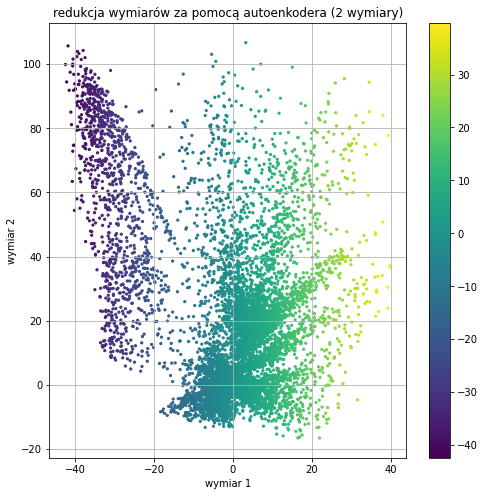

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(encoded_data[:,0],encoded_data[:,1],c=encoded_data[:,0],cmap='viridis',s=5)
plt.colorbar()
plt.title("redukcja wymiarów za pomocą autoenkodera (2 wymiary)")
plt.xlabel("wymiar 1")
plt.ylabel("wymiar 2")
plt.grid()
plt.show()